**CHENNAI HOUSE PREDICTION SALE**(train-chennai-sale.csv)



Importing libraries


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn import metrics 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost import XGBRegressor

In [6]:
df = pd.read_csv('/content/train-chennai-sale.csv')
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [7]:
##Dropping Unwanted Columns

df.drop(['PRT_ID', 'REG_FEE', 'COMMIS'],axis=1,inplace=True)
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
0,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000
1,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770
2,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200
3,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290
4,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250


In [8]:
df.shape

(7109, 19)

In [9]:
##Checking missing values

df.isnull().sum()

AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
SALES_PRICE       0
dtype: int64

In [10]:
##Imputing the values

print(df['N_BEDROOM'].value_counts())

1.0    3795
2.0    2352
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64


In [11]:
df['N_BEDROOM'].fillna(df['N_BEDROOM'].mode()[0], inplace = True)

In [12]:
df['N_BATHROOM'].value_counts()

1.0    5589
2.0    1515
Name: N_BATHROOM, dtype: int64

In [13]:
df['N_BATHROOM'].fillna(df['N_BATHROOM'].mode()[0], inplace = True)

In [14]:
df['QS_OVERALL'].value_counts()

3.540    59
3.260    57
3.320    56
3.560    55
3.360    54
         ..
2.545     1
2.110     1
3.965     1
4.345     1
4.940     1
Name: QS_OVERALL, Length: 479, dtype: int64

In [15]:
df["QS_OVERALL"].fillna(df["QS_OVERALL"].median(),inplace=True)

In [16]:
df.isnull().sum()

AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
SALES_PRICE      0
dtype: int64

Therefore,there is no null values.

In [17]:
##Dropping the Duplicates

df = df.drop_duplicates()
df.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'SALES_PRICE'],
      dtype='object')

In [18]:
df.dtypes

AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
SALES_PRICE        int64
dtype: object

In [19]:
##Changing to Proper Datatype

df['DATE_SALE'] = pd.to_datetime(df['DATE_SALE'],format='%d-%m-%Y')
df['DATE_BUILD'] = pd.to_datetime(df['DATE_BUILD'],format='%d-%m-%Y')
df["N_BEDROOM"]=df["N_BEDROOM"].astype(int)
df["N_BATHROOM"]=df["N_BATHROOM"].astype(int)

In [20]:
##Creating Age of the building column based on the datesale and datebuild columns

df['AGE'] = pd.DatetimeIndex(df['DATE_SALE']).year - pd.DatetimeIndex(df['DATE_BUILD']).year
df.dtypes

AREA                     object
INT_SQFT                  int64
DATE_SALE        datetime64[ns]
DIST_MAINROAD             int64
N_BEDROOM                 int64
N_BATHROOM                int64
N_ROOM                    int64
SALE_COND                object
PARK_FACIL               object
DATE_BUILD       datetime64[ns]
BUILDTYPE                object
UTILITY_AVAIL            object
STREET                   object
MZZONE                   object
QS_ROOMS                float64
QS_BATHROOM             float64
QS_BEDROOM              float64
QS_OVERALL              float64
SALES_PRICE               int64
AGE                       int64
dtype: object

In [21]:
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AGE
0,Karapakkam,1004,2011-05-04,131,1,1,3,AbNormal,Yes,1967-05-15,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,44
1,Anna Nagar,1986,2006-12-19,26,2,1,5,AbNormal,No,1995-12-22,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,11
2,Adyar,909,2012-02-04,70,1,1,3,AbNormal,Yes,1992-02-09,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,20
3,Velachery,1855,2010-03-13,14,3,2,5,Family,No,1988-03-18,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290,22
4,Karapakkam,1226,2009-10-05,84,1,1,3,AbNormal,Yes,1979-10-13,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,30


In [22]:
df.describe()  ##numerical Columns

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AGE
count,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7.109000e+03,7109.000000
mean,1382.073006,99.603179,1.636939,1.213110,3.688704,3.517471,3.507244,3.485300,3.503232,1.089491e+07,24.276270
std,457.410902,57.403110,0.802881,0.409534,1.019099,0.891972,0.897834,0.887266,0.525440,3.768603e+06,12.334164
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.156875e+06,3.000000
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,8.272100e+06,14.000000
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,1.033505e+07,23.000000
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.880000,1.299390e+07,34.000000
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,2.366734e+07,55.000000


Categorical Columns are AREA, PARK_FACIL, UTILITY_AVAIL, STREET, BUILDTYPE,  MZZONE, SALE_COND

In [23]:
##Checking Unique elements in Categorical Columns

print(df['AREA'].unique())
print(df['SALE_COND'].unique())
print(df['PARK_FACIL'].unique())
print(df['BUILDTYPE'].unique())
print(df['UTILITY_AVAIL'].unique())
print(df['STREET'].unique())
print(df['MZZONE'].unique())

['Karapakkam' 'Anna Nagar' 'Adyar' 'Velachery' 'Chrompet' 'KK Nagar'
 'TNagar' 'T Nagar' 'Chrompt' 'Chrmpet' 'Karapakam' 'Ana Nagar' 'Chormpet'
 'Adyr' 'Velchery' 'Ann Nagar' 'KKNagar']
['AbNormal' 'Family' 'Partial' 'AdjLand' 'Normal Sale' 'Ab Normal'
 'Partiall' 'Adj Land' 'PartiaLl']
['Yes' 'No' 'Noo']
['Commercial' 'Others' 'Other' 'House' 'Comercial']
['AllPub' 'ELO' 'NoSewr ' 'NoSeWa' 'All Pub']
['Paved' 'Gravel' 'No Access' 'Pavd' 'NoAccess']
['A' 'RH' 'RL' 'I' 'C' 'RM']


here we see there are mistakes in the area words.


Correcting the words for better understanding.

In [24]:
##Correcting the Spelling Mistakes

df['AREA'].replace(['Karapakam'],'Karapakkam',inplace=True)
df['AREA'].replace(['Ana Nagar','Ana Nagar','Ann Nagar'],'Anna Nagar',inplace=True)
df['AREA'].replace(['Adyr'],'Adyar',inplace=True)
df['AREA'].replace(['Velchery'],'Velachery',inplace=True)
df['AREA'].replace(['Chormpet','Chrmpet','Chrompt'],'Chrompet',inplace=True)
df['AREA'].replace(['KKNagar',],'KK Nagar',inplace=True)
df['AREA'].replace(['TNagar'],  'T Nagar', inplace = True)

df['SALE_COND'].replace(['Ab Normal'],'AbNormal',inplace=True)
df['SALE_COND'].replace(['PartiaLl','Partiall'],'Partial',inplace=True)
df['SALE_COND'].replace(['Adj Land'],'AdjLand',inplace=True)

df['PARK_FACIL'].replace(['Noo'],'No',inplace=True)

df['BUILDTYPE'].replace(['Others'],'Other',inplace=True)
df['BUILDTYPE'].replace(['Comercial'],'Commercial',inplace=True)

df['UTILITY_AVAIL'].replace(['AllPub'],'All Pub',inplace=True)
df['UTILITY_AVAIL'].replace(['NoSewr ', 'NoSeWa'],'NoSewr',inplace=True)

df['STREET'].replace(['Pavd'],'Paved',inplace=True)
df['STREET'].replace(['NoAccess'],'No Access',inplace=True)

In [25]:
print(df['AREA'].unique())
print(df['SALE_COND'].unique())
print(df['PARK_FACIL'].unique())
print(df['BUILDTYPE'].unique())
print(df['UTILITY_AVAIL'].unique())
print(df['STREET'].unique())
print(df['MZZONE'].unique())

['Karapakkam' 'Anna Nagar' 'Adyar' 'Velachery' 'Chrompet' 'KK Nagar'
 'T Nagar']
['AbNormal' 'Family' 'Partial' 'AdjLand' 'Normal Sale']
['Yes' 'No']
['Commercial' 'Other' 'House']
['All Pub' 'ELO' 'NoSewr']
['Paved' 'Gravel' 'No Access']
['A' 'RH' 'RL' 'I' 'C' 'RM']


In [26]:
df.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'SALES_PRICE', 'AGE'],
      dtype='object')

**Exploratory Data Analysis**

EDA for Categorical Columns

Checking Relationship in between the AREA Feature and SALES_PRICE Target columns

([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text major ticklabel objects>)

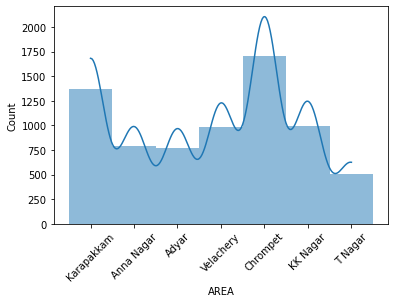

In [27]:
sns.histplot(df.AREA, linewidth=0,kde=True)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

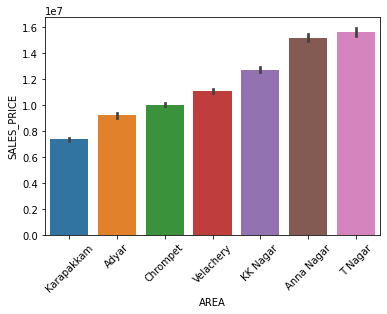

In [28]:
area_order = df.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA']
sns.barplot(x='AREA',y='SALES_PRICE',data=df,order = area_order)
plt.xticks(rotation=45)

Anna Nagar and T Nagar are the area's with highest sale-price.

There is a Linear Relationship in between AREA Feature and SALES_PRICE Target. So, will do label encoding for AREA column.
This feature will help in model fitting.

([0, 1, 2, 3, 4], <a list of 5 Text major ticklabel objects>)

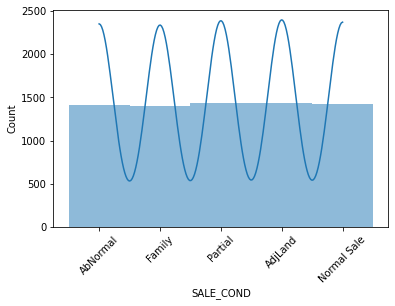

In [29]:
##Checking Relationship in between the SALE_COND Feature and SALES_PRICE Target columns

sns.histplot(df.SALE_COND, linewidth=0,kde=True)
plt.xticks(rotation=45)

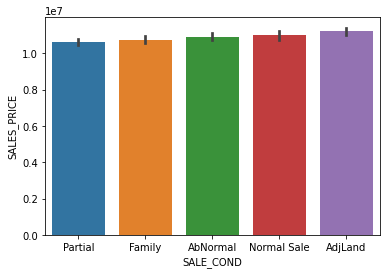

In [30]:
sale_cond_order = df.groupby('SALE_COND')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['SALE_COND']
sns.barplot(x='SALE_COND',y='SALES_PRICE',data=df,order = sale_cond_order)

In SALE_COND condition Column, all Categories are uniformly distributed.

1)There is no Relationship between SALE_COND Feature and SALES_PRICE Target Columns.
2)will drop the SALE_COND feature from this dataset.

([0, 1], <a list of 2 Text major ticklabel objects>)

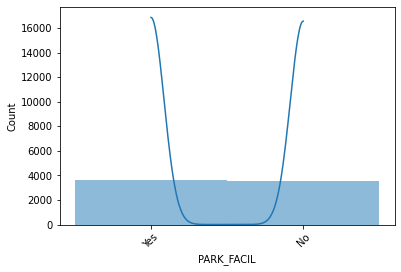

In [31]:
##Checking Relationship in between the PARK_FACIL Feature and SALES_PRICE Target columns

sns.histplot(df.PARK_FACIL, linewidth=0,kde=True)
plt.xticks(rotation=45)

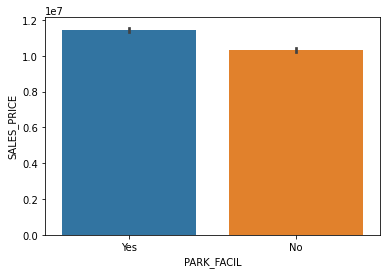

In [32]:
sns.barplot(x='PARK_FACIL',y='SALES_PRICE',data=df)

1)Houses having Park Facilities are more expensive than the houses with no park facility.
2)There is a strong linear relationship in between PARK_FACIL Feature and SALES_PRICE Target.
3)This feature is very useful at the time of model fitting



([0, 1, 2], <a list of 3 Text major ticklabel objects>)

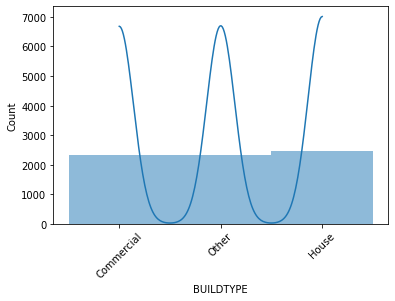

In [33]:
##Checking Relationship in between the BUILDTYPE Feature and SALES_PRICE Target columns

sns.histplot(df.BUILDTYPE, linewidth=0,kde=True)
plt.xticks(rotation=45)

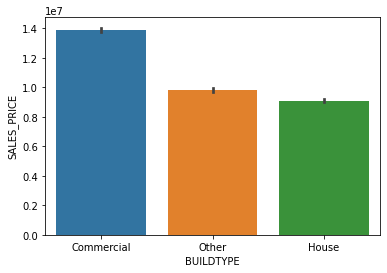

In [34]:
sns.barplot(x='BUILDTYPE',y='SALES_PRICE',data=df)

Commercial Buildings are expensive than the other type of buildings.

There is a relationship in between the BUILDTYPE Feature and SALES_PRICE Target. But there is no linear relationship in between these features. So, will do ONE - HOT encoding for BUILDTYPE column.
(will keep this feature as it is)


([0, 1, 2], <a list of 3 Text major ticklabel objects>)

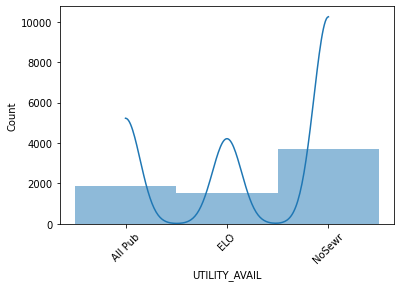

In [35]:
##Checking Relationship in between the UTILITY_AVAIL Feature and SALES_PRICE Target columns

sns.histplot(df.UTILITY_AVAIL, linewidth=0,kde=True)
plt.xticks(rotation=45)

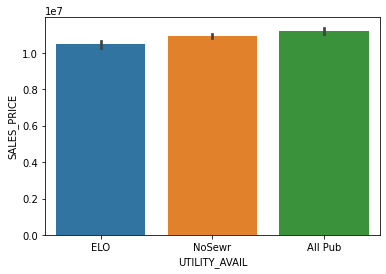

In [36]:
utility_avail_order = df.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['UTILITY_AVAIL']
sns.barplot(x='UTILITY_AVAIL',y='SALES_PRICE',data=df,order = utility_avail_order)

There is a linear relationship in between the UTILITY_AVAIL Feature and SALES_PRICE Target. So, will do label encoding for UTILITY_AVAIL column.
(Will use this feature in model fitting)

([0, 1, 2], <a list of 3 Text major ticklabel objects>)

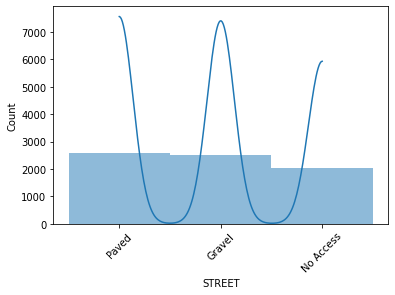

In [37]:
##Checking Relationship in between the STREET Feature and SALES_PRICE Target columns

sns.histplot(df.STREET, linewidth=0,kde=True)
plt.xticks(rotation=45)

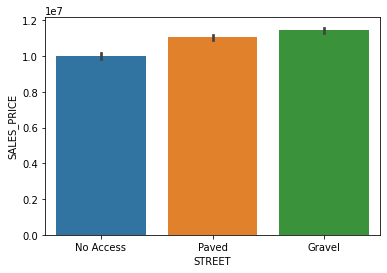

In [38]:
street_order = df.groupby('STREET')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['STREET']
sns.barplot(x='STREET',y='SALES_PRICE',data=df,order = street_order)

Gravel Street houses are more expensive than other types.

There is a linear relationship in between the STREET Feature and SALES_PRICE Target. So, will do label encoding for this STREET feature.
(Will use this feature for furthur process)

([0, 1, 2, 3, 4, 5], <a list of 6 Text major ticklabel objects>)

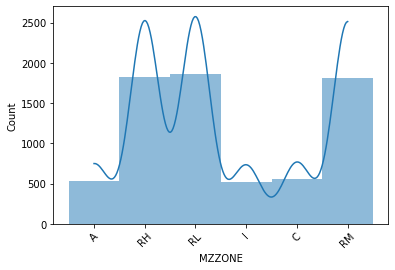

In [39]:
##Checking Relationship in between the MZZONE Feature and SALES_PRICE Target columns

sns.histplot(df.MZZONE, linewidth=0,kde=True)
plt.xticks(rotation=45)

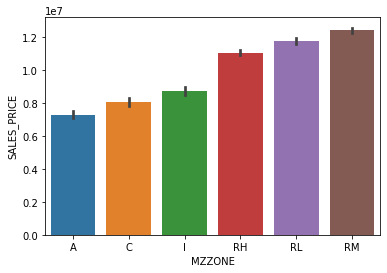

In [40]:
mzzone_order = df.groupby('MZZONE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['MZZONE']
sns.barplot(x='MZZONE',y='SALES_PRICE',data=df,order = mzzone_order)

MZZONE with the values 'RM','RL' & 'RH' has higher sales_price than the other values

There is a linear relationship in between the MZZONE Feature and SALES_PRICE Target. So, will do label encoding for MZZONE feature.
(Will use this feature for furthur process)

(array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 11 Text major ticklabel objects>)

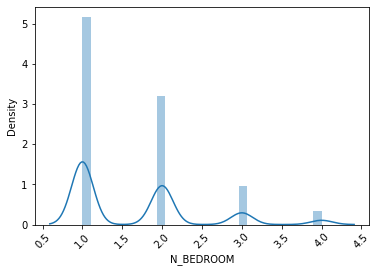

In [41]:
##Checking Relationship in between the N_BEDROOM Feature and SALES_PRICE Target columns

sns.distplot(df['N_BEDROOM'])
plt.xticks(rotation = 45)

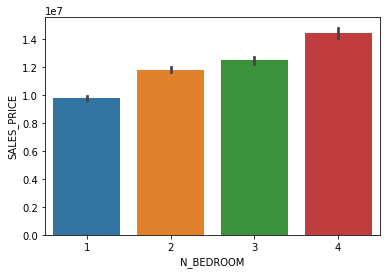

In [42]:
sns.barplot(x='N_BEDROOM',y='SALES_PRICE',data=df)

Number of bed rooms increasing then Sales price also increasing.

There is a linear relationship in between the N_BEDROOM Feature and SALES_PRICE Target.

(array([0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4]),
 <a list of 10 Text major ticklabel objects>)

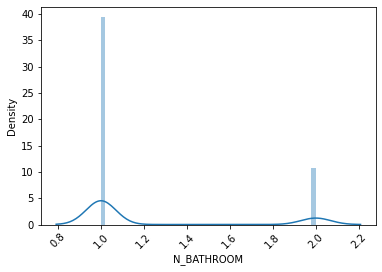

In [43]:
##Checking Relationship in between the N_BATHROOM Feature and SALES_PRICE Target columns

sns.distplot(df['N_BATHROOM'])
plt.xticks(rotation = 45)

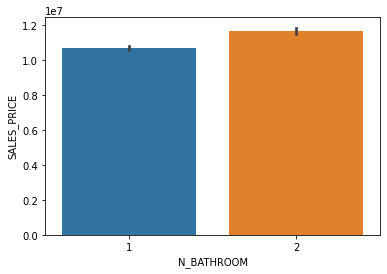

In [44]:
sns.barplot(x='N_BATHROOM',y='SALES_PRICE',data=df)

N_BATHROOM increases then SALES_PRICE is automatically increasing.

There is a linear relationship in between the N_BATHROOM Feature and SALES_PRICE Target columns.

(array([1., 2., 3., 4., 5., 6., 7.]),
 <a list of 7 Text major ticklabel objects>)

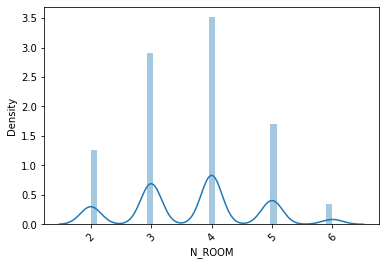

In [45]:
##Checking Relationship in between the N_ROOM Feature and SALES_PRICE Target columns

sns.distplot(df['N_ROOM'])
plt.xticks(rotation = 45)

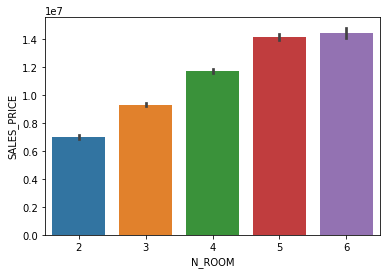

In [46]:
sns.barplot(x='N_ROOM',y='SALES_PRICE',data=df)

N_ROOMS increases then SALES_PRICE is automatically increasing.

There is a relationship in between the N_ROOM Feature and SALES_PRICE Target columns.

**EDA for Numerical Columns**

Checking Linear Relationship in between the INT_SQFT Feature and SALES_PRICE Target columns.

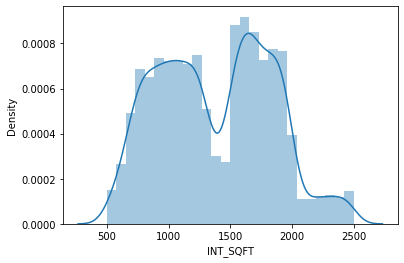

In [47]:
sns.distplot(df['INT_SQFT'])

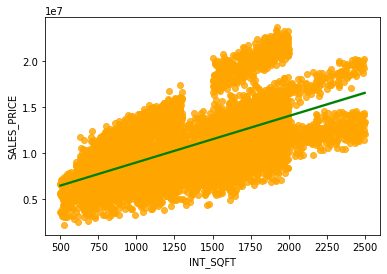

In [48]:
sns.regplot(x='INT_SQFT',y='SALES_PRICE',data=df,scatter_kws={'color':'orange'},line_kws={'color':'green'})

There is a strong linear relationship in between the INT_SQFT Feature and SALES_PRICE Target columns.

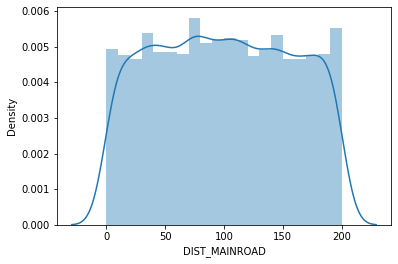

In [49]:
##Checking Relationship in between the DIST_MAINROAD Feature and SALES_PRICE Target columns

sns.distplot(df['DIST_MAINROAD'])

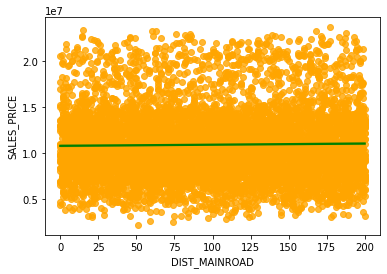

In [50]:
sns.regplot(x='DIST_MAINROAD',y='SALES_PRICE',data=df,scatter_kws={'color':'orange'},line_kws={'color':'green'})

There is no relationship in between the DIST_MAINROAD Feature and SALES_PRICE Target columns.

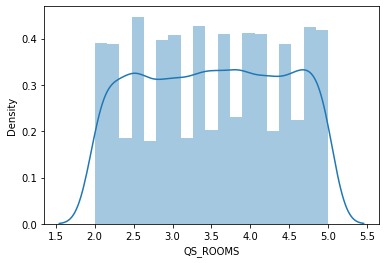

In [51]:
##Checking Relationship in between the QS_ROOMS Feature and SALES_PRICE Target columns

sns.distplot(df['QS_ROOMS'])

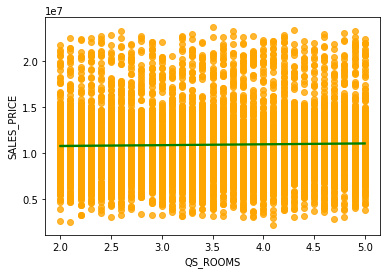

In [52]:
sns.regplot(x='QS_ROOMS',y='SALES_PRICE',data=df,scatter_kws={'color':'orange'},line_kws={'color':'green'})

There is no relationship in between the QS_ROOMS Feature and SALES_PRICE Target columns.

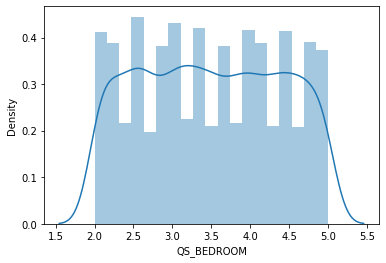

In [53]:
##Checking Relationship in between the QS_BEDROOM Feature and SALES_PRICE Target columns
sns.distplot(df['QS_BEDROOM'])

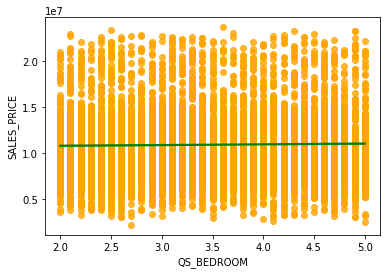

In [54]:
sns.regplot(x='QS_BEDROOM',y='SALES_PRICE',data=df,scatter_kws={'color':'orange'},line_kws={'color':'green'})

There is no relationship in between the QS_BEDROOM Feature and SALES_PRICE Target columns.

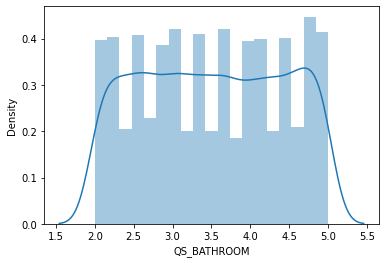

In [55]:
##Checking Relationship in between the QS_BATHROOM Feature and SALES_PRICE Target columns

sns.distplot(df['QS_BATHROOM'])

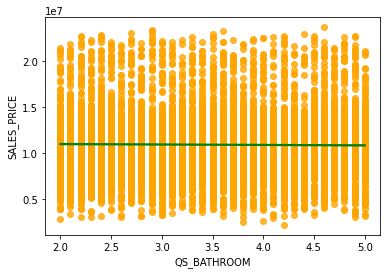

In [56]:
sns.regplot(x='QS_BATHROOM',y='SALES_PRICE',data=df,scatter_kws={'color':'orange'},line_kws={'color':'green'})

There is no relationship in between the QS_BATHROOM Feature and SALES_PRICE Target columns.

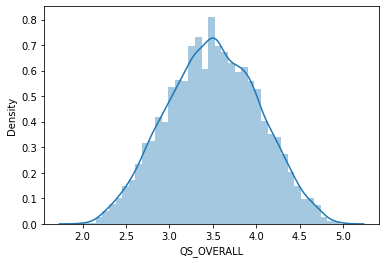

In [57]:
##Checking Relationship in between the QS_OVERALL Feature and SALES_PRICE Target columns

sns.distplot(df['QS_OVERALL'])

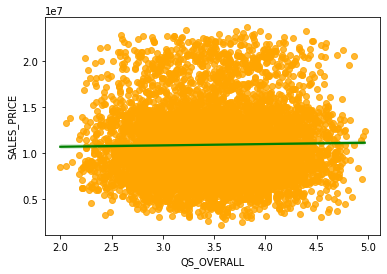

In [58]:
sns.regplot(x='QS_OVERALL',y='SALES_PRICE',data=df,scatter_kws={'color':'orange'},line_kws={'color':'green'})

There is no relationship in between the QS_OVERALL Feature and SALES_PRICE Target columns.

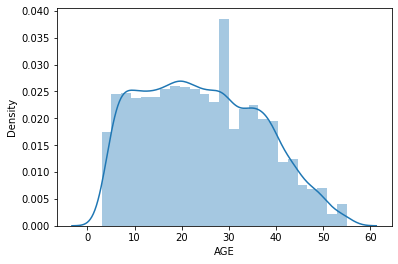

In [59]:
##Checking Relationship in between the AGE Feature and SALES_PRICE Target columns

sns.distplot(df['AGE'])

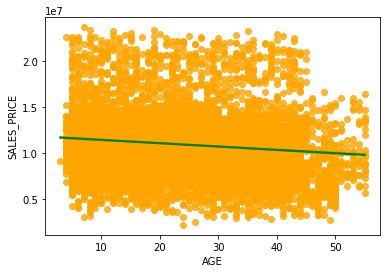

In [60]:
sns.regplot(x='AGE',y='SALES_PRICE',data=df,scatter_kws={'color':'orange'},line_kws={'color':'green'})

There is a negative relationship in between the AGE Feature and SALES_PRICE Target columns.

**Insights From the Analysis**


1.   The distribution of the data in all the columns are normally distributed.
2.   INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM Features having strong relationship with SALES_PRICE Traget.
3.   SALE_COND,DIST_MAINROAD,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL has no relationship with SALES_PRICE Target.







In [61]:
##droping few attributes which has no relationship with sales_price target

df.drop(['SALE_COND','QS_OVERALL','DIST_MAINROAD','QS_ROOMS','QS_BEDROOM','QS_BATHROOM','DATE_BUILD','DATE_SALE'],axis=1,inplace=True)
df.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,AGE
0,Karapakkam,1004,1,1,3,Yes,Commercial,All Pub,Paved,A,7600000,44
1,Anna Nagar,1986,2,1,5,No,Commercial,All Pub,Gravel,RH,21717770,11
2,Adyar,909,1,1,3,Yes,Commercial,ELO,Gravel,RL,13159200,20
3,Velachery,1855,3,2,5,No,Other,NoSewr,Paved,I,9630290,22
4,Karapakkam,1226,1,1,3,Yes,Other,All Pub,Gravel,C,7406250,30


**Encoding of the data**

Label Encoding for binary class and multi class - ordinal data

In [62]:
df.AREA = df.AREA.map({'Karapakkam':0, 'Adyar':1, 'Chrompet':2, 'Velachery':3, 'KK Nagar':4, 'Anna Nagar':5, 'T Nagar':6})
df.PARK_FACIL = df.PARK_FACIL.map({'Yes':1, 'No':0})
df.UTILITY_AVAIL = df.UTILITY_AVAIL.map({'ELO':0, 'NoSewr':1, 'All Pub':2})
df.STREET = df.STREET.map({'No Access':0, 'Paved':1, 'Gravel':2})
df.MZZONE = df.MZZONE.map({'A':0, 'C':1, 'I':2, 'RH':4, 'RL':5, 'RM':6})

One-Hot Encoding for Multi-Class Nominal data

In [63]:
df=pd.get_dummies(df,columns=["BUILDTYPE"])
df.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,AGE,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Other
0,0,1004,1,1,3,1,2,1,0,7600000,44,1,0,0
1,5,1986,2,1,5,0,2,2,4,21717770,11,1,0,0
2,1,909,1,1,3,1,0,2,5,13159200,20,1,0,0
3,3,1855,3,2,5,0,1,1,2,9630290,22,0,0,1
4,0,1226,1,1,3,1,2,2,1,7406250,30,0,0,1


In [64]:
df.dtypes

AREA                    int64
INT_SQFT                int64
N_BEDROOM               int64
N_BATHROOM              int64
N_ROOM                  int64
PARK_FACIL              int64
UTILITY_AVAIL           int64
STREET                  int64
MZZONE                  int64
SALES_PRICE             int64
AGE                     int64
BUILDTYPE_Commercial    uint8
BUILDTYPE_House         uint8
BUILDTYPE_Other         uint8
dtype: object

In [65]:
df.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,AGE,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Other
0,0,1004,1,1,3,1,2,1,0,7600000,44,1,0,0
1,5,1986,2,1,5,0,2,2,4,21717770,11,1,0,0
2,1,909,1,1,3,1,0,2,5,13159200,20,1,0,0
3,3,1855,3,2,5,0,1,1,2,9630290,22,0,0,1
4,0,1226,1,1,3,1,2,2,1,7406250,30,0,0,1


**Linear Regression Model**

In [66]:
X = df.drop('SALES_PRICE',axis=1)
y = df['SALES_PRICE'].values

In [67]:
##Splitting

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [68]:
##Scaling

scaler = StandardScaler() 
scaler.fit(X_train,y_train) 
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)

In [69]:
##Model Fitting

regressor = LinearRegression() 
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [70]:
##Predicting Values

y_pred = regressor.predict(X_test_scaled)
y_pred

array([14446851.41011439,  7039042.65969123,  8644496.41013098, ...,
       12948046.94570941,  8865883.93924932, 13311382.01752691])

In [71]:
##Evaluation Metric-R2 Score

print('R2- SCORE:', r2_score(y_test,y_pred))

R2- SCORE: 0.9171437070702475


**K Nearest Neighbours algorithm (KNN)**

In [81]:
##Hyper parameter Tuning,Fitting the model

for i in [1,2,3,4,5,6,7,8,9,10,20,50]:
  knn = KNeighborsRegressor(i)
  knn.fit(X_train_scaled,y_train) 
  print("K value  : " , i, " train score : ", knn.score(X_train_scaled,y_train) , " score : ", np.mean(cross_val_score(knn, X_train_scaled, y_train, cv=10)))

K value  :  1  train score :  0.9999969992027196  score :  0.9388807370830966
K value  :  2  train score :  0.9856192827585183  score :  0.9480038878110303
K value  :  3  train score :  0.978306375833822  score :  0.950973691938449
K value  :  4  train score :  0.9741685064348001  score :  0.9512906191426136
K value  :  5  train score :  0.970453415270668  score :  0.9518026833160874
K value  :  6  train score :  0.9681927178909012  score :  0.9509580620849354
K value  :  7  train score :  0.9659397253244368  score :  0.9502923744729829
K value  :  8  train score :  0.9637450090923098  score :  0.9496829536240069
K value  :  9  train score :  0.9621503961455838  score :  0.949156782340201
K value  :  10  train score :  0.9608112082273106  score :  0.9481006893310336
K value  :  20  train score :  0.9495057919538243  score :  0.9408826152587633
K value  :  50  train score :  0.9256699484917469  score :  0.918003029793461


In [82]:
##Scoring the model-R2 Score with best hyperparameter

knn = KNeighborsRegressor(3)
knn.fit(X_train_scaled,y_train)
knn.score(X_test_scaled,y_test)

0.9516896831612345

**Decision Tree Regressor Algorithm**

In [83]:
##Fitting the model

dt = DecisionTreeRegressor(max_depth = 4)
dt.fit(X_train_scaled, y_train)

DecisionTreeRegressor(max_depth=4)

In [84]:
##Predicted values

y_pred = dt.predict(X_test_scaled)
y_pred

array([13730105.74257426,  7500252.26586103,  9268861.64541833, ...,
       13630112.18658892,  9268861.64541833, 12360823.10541311])

In [85]:
##Evaluation Metric-R2 Score

print('R2- SCORE:', r2_score(y_test,y_pred))

R2- SCORE: 0.8841043495006824


**Random Forest Regressor Algorithm**

In [72]:
##Fitting the model

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
rf = RandomForestRegressor(n_estimators= 100, max_depth = 4, max_features='sqrt')
rf.fit(X_train_scaled, y_train)
y_pred = rf.predict(X_test_scaled)

In [73]:
##Predicting Values

y_pred = rf.predict(X_test_scaled) 
y_pred

array([13278170.66827748,  7472444.03517918,  9548100.990872  , ...,
       12667610.68238251,  9440774.75762647, 12488162.75792133])

In [74]:
##Evaluation Metric-R2 Score

print('R2- SCORE:', r2_score(y_test,y_pred))

R2- SCORE: 0.8732882371990837


**XG Boost Algorithm**

In [75]:
##Tuning Based on the learning rate, Fitting the model

for lr in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  model = xgb.XGBRegressor(learning_rate = lr, n_estimators=100, verbosity = 0)
  model.fit(X_train_scaled,y_train)
  model.score(X_test_scaled, y_test) # scoring the model - r2 squared
  print("Learning rate : ", lr, " Train score : ", model.score(X_train_scaled,y_train), " Cross-Val score : ", np.mean(cross_val_score(model, X_train_scaled,y_train)))

Learning rate :  0.01  Train score :  -0.382736018114205  Cross-Val score :  -0.39095584242308423
Learning rate :  0.02  Train score :  0.7460849990078784  Cross-Val score :  0.7422735681242502
Learning rate :  0.03  Train score :  0.9246931645606293  Cross-Val score :  0.921661113925358
Learning rate :  0.04  Train score :  0.9623428553426207  Cross-Val score :  0.9595154931123787
Learning rate :  0.05  Train score :  0.9743679181021554  Cross-Val score :  0.9717556570662133
Learning rate :  0.06  Train score :  0.9805565901475647  Cross-Val score :  0.9781279351911886
Learning rate :  0.07  Train score :  0.9841665730670892  Cross-Val score :  0.9821922141109811
Learning rate :  0.08  Train score :  0.9871997650978995  Cross-Val score :  0.9852955699392311
Learning rate :  0.09  Train score :  0.9891502971924533  Cross-Val score :  0.9871448745843988
Learning rate :  0.1  Train score :  0.9904815029454004  Cross-Val score :  0.9884219281044953
Learning rate :  0.11  Train score :  0.

In [76]:
##Calcuating Score- R2 Score

model = xgb.XGBRegressor(learning_rate = 0.7, n_estimators=100)
model.fit(X_train_scaled,y_train)
model.score(X_test_scaled, y_test)

[10:46:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.9941943304904928

In [77]:
##Feature Importances

from sklearn.feature_selection import RFE
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=3, step=1)
selector = selector.fit(X_train_scaled, y_train)
list(zip(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'PARK_FACIL',
       'UTILITY_AVAIL', 'STREET', 'MZZONE', 'AGE',
       'BUILDTYPE_Commercial', 'BUILDTYPE_House', 'BUILDTYPE_Other'],selector.support_))

[('AREA', True),
 ('INT_SQFT', False),
 ('N_BEDROOM', False),
 ('N_BATHROOM', False),
 ('N_ROOM', True),
 ('PARK_FACIL', False),
 ('UTILITY_AVAIL', False),
 ('STREET', False),
 ('MZZONE', False),
 ('AGE', False),
 ('BUILDTYPE_Commercial', True),
 ('BUILDTYPE_House', False),
 ('BUILDTYPE_Other', False)]

In [1]:
!pip install scikit-learn==0.24

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 22.3 MB 1.4 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
      Successfully uninstalled scikit-learn-0.24.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.5 requires scikit-learn>=1.0.0, but you have scikit-learn 0.24.0 which is incompatible.


In [78]:
from sklearn.feature_selection import SequentialFeatureSelector
estimator = LinearRegression()
sfs = SequentialFeatureSelector(estimator, n_features_to_select=2)
sfs.fit(X_train_scaled, y_train)
print(list(zip(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'PARK_FACIL',
       'UTILITY_AVAIL', 'STREET', 'MZZONE', 'AGE',
       'BUILDTYPE_Commercial', 'BUILDTYPE_House', 'BUILDTYPE_Other'],sfs.get_support())))

[('AREA', True), ('INT_SQFT', False), ('N_BEDROOM', False), ('N_BATHROOM', False), ('N_ROOM', False), ('PARK_FACIL', False), ('UTILITY_AVAIL', False), ('STREET', False), ('MZZONE', False), ('AGE', False), ('BUILDTYPE_Commercial', True), ('BUILDTYPE_House', False), ('BUILDTYPE_Other', False)]


Text(0.5, 1.0, 'Feature Importance')

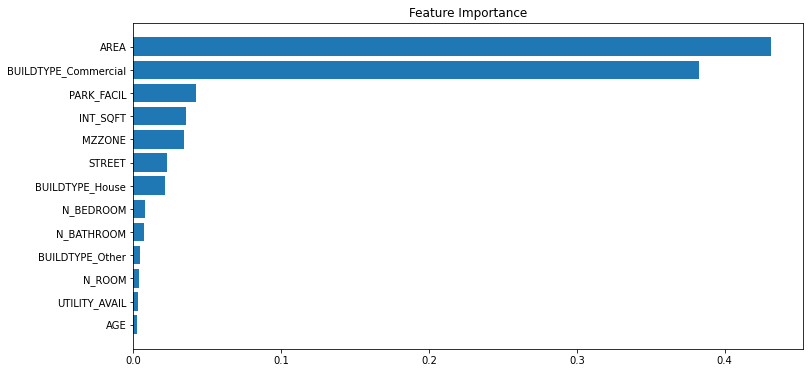

In [79]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

The Columns AREA and BUILDTYPE_Commercial are the important features.

Report:R2 Scores of all models are

Linear Regression - 0.917

K Nearest Neighbours - 0.951

Decision Tree - 0.884

Random Forest - 0.873

XG Boost - 0.994

Conclusion: The best Machine Learning algorithm for Chennai House Price Prediction is XG Boost Model.

---



---

